목표:
“리뷰 점수에 따라 고객이 자주 쓰는 단어(키워드)는 어떻게 다를까?”

In [2]:
import pandas as pd

df = pd.read_csv('./data/olist_processed.csv')
df

,주문 ID,고객 ID,주문 상태,주문 시간,결제 승인 시각,고객 수령일 (실제 배송일),예상 배송일,고유 고객 ID,우편번호 앞자리,고객 도시,...,리뷰 ID,리뷰 점수,리뷰 제목,리뷰 내용,리뷰 작성일,리뷰 응답 시각,판매자 우편번호,판매자 도시,판매자 주,bad_review
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,...,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,31570.0,belo horizonte,SP,0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,...,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,14840.0,guariba,SP,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,...,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,17602.0,tupa,SP,0
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,...,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,8290.0,sao paulo,SP,0
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,...,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,37175.0,ilicinea,MG,1
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,...,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,37175.0,ilicinea,MG,1


In [3]:
def 리뷰등급화(score):
    if score <= 2:
        return 'Low'
    elif score == 3:
        return 'Mid'
    elif score >= 4:
        return 'High'

df['리뷰등급'] = df['리뷰 점수'].apply(리뷰등급화)

In [4]:
# 필요한 컬럼만 추출
df_text = df[df['리뷰등급'].isin(['Low', 'High'])][['리뷰 내용', '리뷰 점수', '리뷰등급']].dropna()


In [5]:
df_text['리뷰 내용']

0         Não testei o produto ainda, mas ele veio corre...
1         Não testei o produto ainda, mas ele veio corre...
2         Não testei o produto ainda, mas ele veio corre...
3                                      Muito bom o produto.
5         O produto foi exatamente o que eu esperava e e...
                                ...                        
119129    Ele não é um mini cajon, é um shaker, ou seja,...
119138         So uma peça que veio rachado mas tudo bem rs
119139                         Foi entregue antes do prazo.
119140    Foi entregue somente 1. Quero saber do outro p...
119141    Foi entregue somente 1. Quero saber do outro p...
Name: 리뷰 내용, Length: 45714, dtype: object

In [6]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

nltk.download('stopwords')

# 기계 번역 후 의미 없는 단어들 수동 필터링
custom_useless_words = set([
    'produto', 'entrega', 'loja', 'boa', 'gostei',  # 너무 일반적인 단어
    'veio', 'comprar', 'chegou', 'tudo', 'ótimo', 'bom', 'bem',
    'parabéns', 'rapidez', 'perfeito', 'legal', 'excelente',
    'ainda', 'antes', 'dentro', 'recebi', 'chegado',
])

stop_words = set(stopwords.words('portuguese'))
all_stopwords = stop_words.union(custom_useless_words)

def tokenize_pt(text):
    text = re.sub(r'[^a-zA-ZÀ-ÿ\s]', '', str(text).lower())  # 특수문자 제거 + 소문자화
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return tokens



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\J\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
low_reviews = df_text[df_text['리뷰등급'] == 'Low']['리뷰 내용'].apply(tokenize_pt).sum()
high_reviews = df_text[df_text['리뷰등급'] == 'High']['리뷰 내용'].apply(tokenize_pt).sum()

# low_counts = Counter(low_reviews)
# high_counts = Counter(high_reviews)

low_counts = Counter(low_reviews).most_common(30)
high_counts = Counter(high_reviews).most_common(30)

In [44]:
def compute_relative_importance(high_counts, low_counts, top_n=30):
    all_words = set(high_counts.keys()).union(set(low_counts.keys()))
    result = []

    total_high = sum(high_counts.values())
    total_low = sum(low_counts.values())

    for word in all_words:
        high_freq = high_counts[word] / total_high if total_high else 0
        low_freq = low_counts[word] / total_low if total_low else 0
        diff = high_freq - low_freq
        result.append((word, diff, high_freq, low_freq))

    # 정렬: 특정 그룹에 더 많이 등장하는 순서
    result_sorted = sorted(result, key=lambda x: abs(x[1]), reverse=True)
    return result_sorted[:top_n]


In [45]:
top_keywords = compute_relative_importance(high_counts, low_counts)

for word, diff, h, l in top_keywords:
    group = "High" if diff > 0 else "Low"
    print(f"{word}: 상대적으로 {group}에 많음 (High={h:.4f}, Low={l:.4f})")


prazo: 상대적으로 High에 많음 (High=0.0456, Low=0.0073)
antes: 상대적으로 High에 많음 (High=0.0342, Low=0.0015)
recebi: 상대적으로 Low에 많음 (High=0.0103, Low=0.0348)
bom: 상대적으로 High에 많음 (High=0.0260, Low=0.0021)
recomendo: 상대적으로 High에 많음 (High=0.0246, Low=0.0029)
entrega: 상대적으로 High에 많음 (High=0.0303, Low=0.0123)
produto: 상대적으로 High에 많음 (High=0.0694, Low=0.0519)
comprei: 상대적으로 Low에 많음 (High=0.0042, Low=0.0215)
bem: 상대적으로 High에 많음 (High=0.0178, Low=0.0017)
chegou: 상대적으로 High에 많음 (High=0.0259, Low=0.0114)
tudo: 상대적으로 High에 많음 (High=0.0143, Low=0.0010)
excelente: 상대적으로 High에 많음 (High=0.0117, Low=0.0001)
ótimo: 상대적으로 High에 많음 (High=0.0114, Low=0.0001)
qualidade: 상대적으로 High에 많음 (High=0.0145, Low=0.0034)
super: 상대적으로 High에 많음 (High=0.0106, Low=0.0006)
rápida: 상대적으로 High에 많음 (High=0.0089, Low=0.0002)
ainda: 상대적으로 Low에 많음 (High=0.0045, Low=0.0130)
veio: 상대적으로 Low에 많음 (High=0.0079, Low=0.0155)
nao: 상대적으로 Low에 많음 (High=0.0014, Low=0.0089)
apenas: 상대적으로 Low에 많음 (High=0.0013, Low=0.0085)
gostei: 상대적으로 High에 많음 (High=0.0

In [26]:
low_counts

[('produto', 7367),
 ('recebi', 4947),
 ('comprei', 3059),
 ('veio', 2203),
 ('entregue', 1973),
 ('ainda', 1843),
 ('entrega', 1747),
 ('chegou', 1614),
 ('pedido', 1275),
 ('nao', 1260),
 ('compra', 1212),
 ('apenas', 1201),
 ('prazo', 1030),
 ('dia', 1014),
 ('produtos', 1014),
 ('loja', 986),
 ('dois', 971),
 ('agora', 926),
 ('contato', 706),
 ('site', 698),
 ('pois', 669),
 ('duas', 658),
 ('quero', 649),
 ('outro', 642),
 ('nota', 640),
 ('aguardando', 639),
 ('nada', 639),
 ('lannister', 633),
 ('fiz', 593),
 ('porém', 581)]

In [8]:
from googletrans import Translator
from wordcloud import WordCloud
import matplotlib.pyplot as plt

translator = Translator()

# 번역 함수
def translate_keywords_googletrans(counter_list):
    translated = []
    for word, count in counter_list:
        try:
            result = translator.translate(word, src='pt', dest='ko')
            translated.append((result.text, count))
        except Exception as e:
            print(f"⚠️ 번역 실패 ({word}): {e}")
            translated.append((word, count))  # 실패하면 원어 유지
    return translated


In [42]:
from googletrans import Translator

def translate_keywords(counter_obj, src='pt', dest='ko'):
    translator = Translator()
    translated_counts = []

    for word, count in counter_obj.items():
        try:
            translated = translator.translate(word, src=src, dest=dest).text
            translated_counts.append((translated, count))
        except Exception as e:
            print(f"⚠️ 번역 실패: {word} - {e}")
            translated_counts.append((word, count))  # 번역 실패시 원문 유지

    return translated_counts


In [9]:
low_translated = translate_keywords_googletrans(low_counts)
high_translated = translate_keywords_googletrans(high_counts)


In [43]:
high_translated = translate_keywords(high_counts)
low_translated = translate_keywords(low_counts)

# 결과 확인
for word, count in high_translated[:10]:
    print(f"{word}: {count}")


KeyboardInterrupt: 

In [30]:
high_translated

[('제품', 11998),
 ('용어', 7874),
 ('~ 전에', 5918),
 ('배달', 5244),
 ('좋은', 4498),
 ('도착했습니다', 4485),
 ('추천하다', 4258),
 ('좋은', 3075),
 ('품질', 2502),
 ('전달', 2481),
 ('모두', 2473),
 ('훌륭한', 2014),
 ('훌륭한', 1973),
 ('감독자', 1830),
 ('나는 받았다', 1778),
 ('가게', 1703),
 ('나는 좋아했다', 1613),
 ('빠른', 1538),
 ('이내에', 1370),
 ('그는왔다', 1369),
 ('구입하다', 1264),
 ('좋은', 1196),
 ('빠른', 1023),
 ('완벽한', 1003),
 ('훌륭한', 995),
 ('축하해요', 990),
 ('언제나', 879),
 ('오른쪽', 874),
 ('제품', 862),
 ('~에 따르면', 840)]

In [31]:
low_translated

[('제품', 7367),
 ('나는 받았다', 4947),
 ('나는 샀다', 3059),
 ('그는왔다', 2203),
 ('전달', 1973),
 ('아직', 1843),
 ('배달', 1747),
 ('도착했습니다', 1614),
 ('주문하다', 1275),
 ('아니요', 1260),
 ('구입하다', 1212),
 ('단지', 1201),
 ('용어', 1030),
 ('낮', 1014),
 ('제품', 1014),
 ('가게', 986),
 ('둘', 971),
 ('지금', 926),
 ('연락하다', 706),
 ('웹 사이트', 698),
 ('그 다음에', 669),
 ('둘', 658),
 ('나는 원해요', 649),
 ('다른', 642),
 ('알아채다', 640),
 ('대기 중', 639),
 ('아무것도 아님', 639),
 ('라니 스터', 633),
 ('나는했다', 593),
 ('하지만', 581)]

In [11]:
import os

print(os.path.exists('C:/Windows/Fonts/malgun.ttf'))  # Windows

True


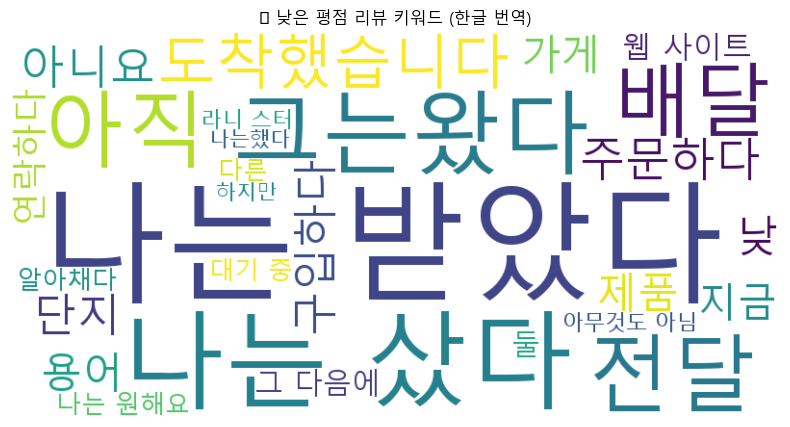

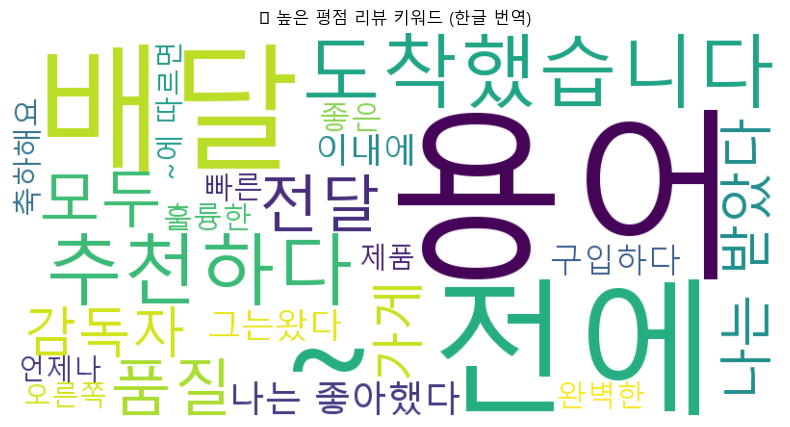

In [13]:
font_path = "C:/Windows/Fonts/malgun.ttf"  # 환경에 따라 경로 수정
plt.rcParams['font.family'] = 'Malgun Gothic'

# Low 리뷰 워드클라우드
wc_low = WordCloud(    font_path=font_path, background_color='white',
                   width=800, height=400).generate_from_frequencies(dict(low_translated))

plt.figure(figsize=(10, 5))
plt.imshow(wc_low, interpolation='bilinear')
plt.axis('off')
plt.title("❌ 낮은 평점 리뷰 키워드 (한글 번역)")
plt.show()

# High 리뷰 워드클라우드
wc_high = WordCloud(     font_path=font_path, background_color='white',
                    width=800, height=400).generate_from_frequencies(dict(high_translated))

plt.figure(figsize=(10, 5))
plt.imshow(wc_high, interpolation='bilinear')
plt.axis('off')
plt.title("✅ 높은 평점 리뷰 키워드 (한글 번역)")
plt.show()


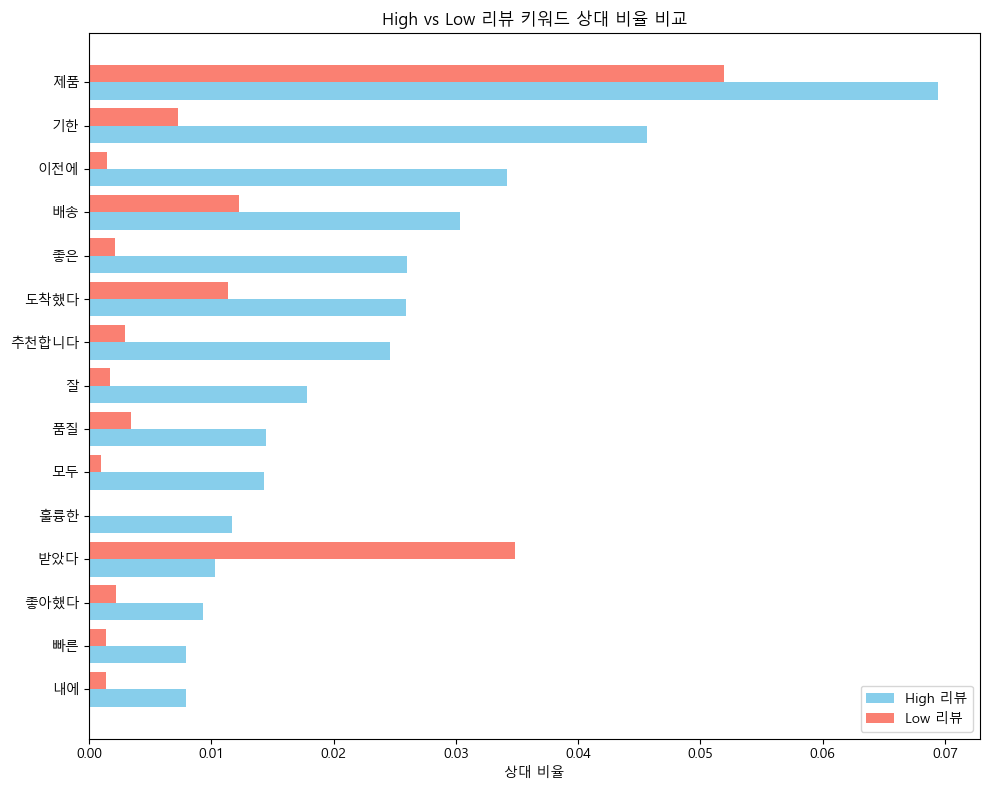

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.family'] = 'Malgun Gothic'
# 키워드와 비율 데이터
keywords = [
    '기한', '이전에', '받았다', '좋은', '추천합니다', '배송', '제품', '샀다', '잘', '도착했다',
    '모두', '훌륭한', '관리자', '가게', '좋아했다', '빠른', '내에', '왔다', '구매', '아직도',
    '아니다', '주문', '두 개', '완벽한', '축하합니다', '항상', '정확한', '품질'
]

high_ratios = [
    0.0456, 0.0342, 0.0103, 0.0260, 0.0246, 0.0303, 0.0694, 0.0042, 0.0178, 0.0259,
    0.0143, 0.0117, 0.0001, 0.0011, 0.0093, 0.0079, 0.0079, 0.0079, 0.0013, 0.0045,
    0.0014, 0.0027, 0.0011, 0.0058, 0.0057, 0.0001, 0.0069, 0.0145
]

low_ratios = [
    0.0073, 0.0015, 0.0348, 0.0021, 0.0029, 0.0123, 0.0519, 0.0215, 0.0017, 0.0114,
    0.0010, 0.0001, 0.0001, 0.0068, 0.0022, 0.0014, 0.0014, 0.0155, 0.0085, 0.0130,
    0.0089, 0.0090, 0.0068, 0.0001, 0.0001, 0.0001, 0.0016, 0.0034
]

# 데이터프레임 생성
df = pd.DataFrame({
    '키워드': keywords,
    'High': high_ratios,
    'Low': low_ratios
})

# High 비율 기준 상위 15개 추출
top_keywords = df.sort_values(by='High', ascending=False).head(15)

# 시각화
plt.figure(figsize=(10, 8))
bar_width = 0.4
index = range(len(top_keywords))

plt.barh([i + bar_width for i in index], top_keywords['High'], height=bar_width, label='High 리뷰', color='skyblue')
plt.barh(index, top_keywords['Low'], height=bar_width, label='Low 리뷰', color='salmon')

plt.yticks([i + bar_width / 2 for i in index], top_keywords['키워드'])
plt.xlabel('상대 비율')
plt.title('High vs Low 리뷰 키워드 상대 비율 비교')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
